Simiple Pendulum

In [22]:
## import modules
from sympy import *
from sympy.physics.mechanics import *
from scipy.integrate import solve_ivp
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import ffmpeg
from matplotlib.animation import FFMpegWriter
init_vprinting()

In [23]:
## defining lagrangian
m,g,l,t = symbols("m g ell t")
theta = dynamicsymbols("theta") 

## positions coordinates
x= l*sin(theta)
y= -l*cos(theta)

## velocities
x_1t=diff(x,t)
y_1t=diff(y,t)

theta_1t=diff(theta,t)
theta_2t=diff(theta_1t,t)

## energies
KE=0.5*m*(l*theta_1t)**2
PE=m*g*y

## lagrangian
L=KE-PE

In [24]:
eqn1=diff(diff(L,theta_1t),t) - diff(L,theta)
sln=solve(eqn1,theta_2t)
Eq(theta_2t,sln[0])

In [25]:
var=Matrix([theta,theta_1t])
var_1t=diff(var,t)
Eq(var_1t,Matrix([theta_1t,sln[0]]))

      ⎡    θ̇     ⎤
⎡θ̇⎤   ⎢          ⎥
⎢ ⎥ = ⎢-g⋅sin(θ) ⎥
⎣θ̈⎦   ⎢──────────⎥
      ⎣   ell    ⎦

In [26]:
g=9.81
l=1
T=(2*np.pi*(np.sqrt(l/g)))/4 ## time period /four 
Tp=0.5212

import numpy as np

## initial conditions
theta_0=np.deg2rad(45)
theta_0t=0
theta_0t_dot= -g*np.sin(theta_0)/l

def pendulum_ode(t,y):
    return(y[1],-g*np.sin(y[0])/l)

## solve 
sol=solve_ivp(pendulum_ode,[0,40*Tp],(theta_0,theta_0t),t_eval=np.arange(0,40*Tp,Tp/8))

print(sol)

theta=sol.y[0]
print(len(theta))

#print(theta)
#theta_t=sol.y[1]
#print(theta_1t)
#print(np.rad2deg(sol.y[2]))

##convert rad to deg
theta_deg=np.rad2deg(sol.y[0])
#print(theta_deg)
theta_dot_deg=np.rad2deg(sol.y[1])
#print(theta_dot_deg)
t=sol.t
#print(t)
np.savetxt("pendulum.csv",np.transpose([theta_deg,theta_dot_deg]),delimiter=",")



  message: The solver successfully reached the end of the integration interval.
  success: True
   status: 0
        t: [ 0.000e+00  6.515e-02 ...  2.072e+01  2.078e+01]
        y: [[ 7.854e-01  7.707e-01 ...  7.264e-01  7.641e-01]
            [ 0.000e+00 -4.497e-01 ...  7.958e-01  3.613e-01]]
      sol: None
 t_events: None
 y_events: None
     nfev: 494
     njev: 0
      nlu: 0
320


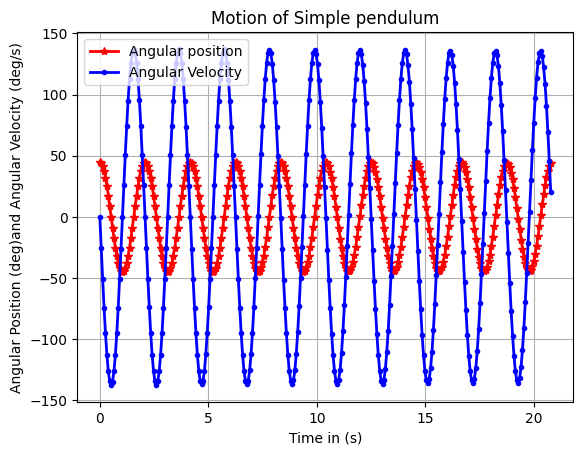

In [27]:
## plot
plt.plot(t,theta_deg,label="Angular position",color="red",linestyle="-",marker="*",lw=2)
plt.plot(t,theta_dot_deg,label="Angular Velocity",color="blue",linestyle="-",marker=".",lw=2)
plt.legend()
plt.title("Motion of Simple pendulum")
plt.xlabel("Time in (s)")
plt.ylabel("Angular Position (deg)and Angular Velocity (deg/s)")
plt.grid()
plt.show()

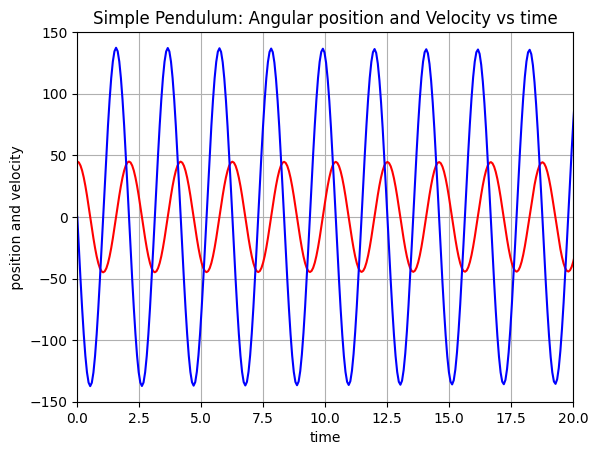

In [28]:
## Animation
fig,ax=plt.subplots()

theta_curve,=ax.plot(t[0],theta_deg[0],"r")
theta_dot_curve,=ax.plot(t[0],theta_dot_deg[0],"b")
ax.set_title("Simple Pendulum: Angular position and Velocity vs time")
ax.set_xlim(0,20)
ax.set_ylim(-150,150)
ax.set_xlabel("time")
ax.set_ylabel(" position and velocity ")
ax.grid()

def animate(i):
    theta_curve.set_data(t[:i+1],theta_deg[:i+1])
    theta_dot_curve.set_data(t[:i+1],theta_dot_deg[:i+1])

animat= animation.FuncAnimation(fig,animate,frames=len(t))
animat.save("velocity_and_Position_curve_animation.mp4", writer=FFMpegWriter(fps=30))
plt.show()


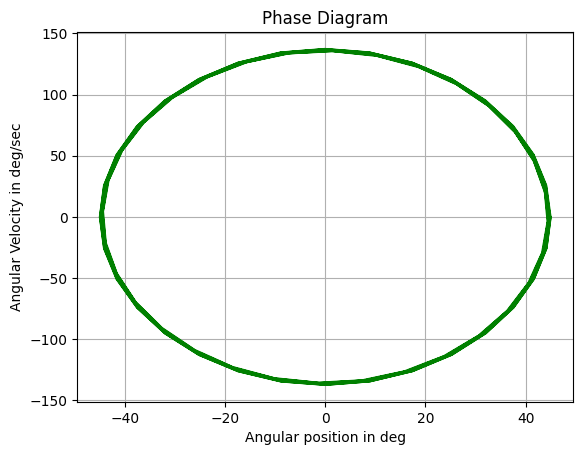

In [ ]:
## Phase diagram
plt.plot(theta_deg,theta_dot_deg,"g")
plt.title("Phase Diagram")
plt.xlabel("Angular position in deg")
plt.ylabel("Angular Velocity in deg/sec")
plt.grid()
plt.show()

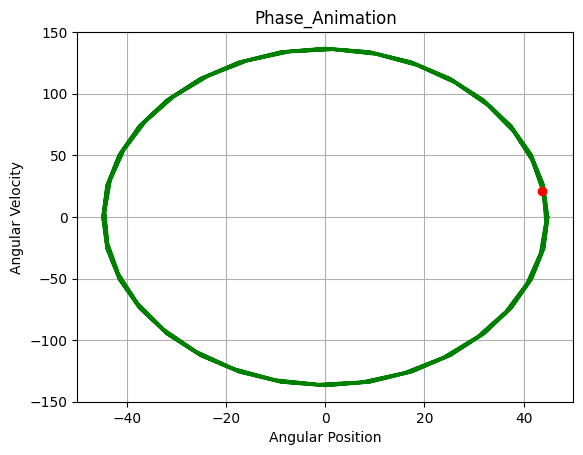

In [30]:
## Animate Phase Diagram

fig_phase,ax=plt.subplots()

phase_curve, =ax.plot(theta_deg[0],theta_dot_deg[0],"g")
phase_dot, =ax.plot(theta_deg[0],theta_dot_deg[0],"ro")

ax.set_title("Phase_Animation")
ax.set_xlabel("Angular Position")
ax.set_xlim(-50,50)
ax.set_ylim(-150,150)
ax.set_ylabel("Angular Velocity")
ax.grid()
def anim_phase(i):
    phase_curve.set_data(theta_deg[:i+1],theta_dot_deg[:i+1])
    phase_dot.set_data([theta_deg[i]],[theta_dot_deg[i]])

Phase_anim=animation.FuncAnimation(fig_phase,anim_phase,frames=len(t))
Phase_anim.save("Phase_animation.mp4",writer=FFMpegWriter(fps=(30)))
plt.show()


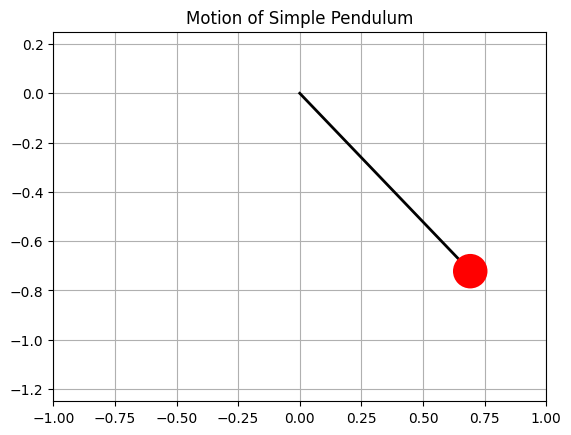

In [31]:
## Animate the Pendulum Swing
def pend_position(theta):
    return (l*sin(theta),-l*cos(theta))

fig_swing=plt.figure()
ax = fig_swing.add_subplot(aspect="equal")
ax.set_xlim(-1,1)
ax.set_ylim(-1.25,0.25)
ax.grid()
ax.set_title("Motion of Simple Pendulum")

x0,y0=pend_position(theta_0)
rope,=ax.plot([0,x0],[0,y0],"k",lw=2)
mass_circle=ax.add_patch(plt.Circle(pend_position(theta_0),radius=0.07,fc="r",zorder=2))

def animation_swing(i):
    
    x,y=pend_position(theta[i])
    rope.set_data([0,x],[0,y])
    mass_circle.set_center((x,y))

swing_animation=animation.FuncAnimation(fig_swing,animation_swing,frames=len(t))
swing_animation.save("swing_animation.mp4",writer=FFMpegWriter(fps=30))

plt.show()